In [ ]:
from random import randint
from timeit import default_timer as timer
from tabulate import tabulate

from matplotlib import pyplot as plt  
import numpy as np  

import unittest
import time
from numpy import random
import math 

# Question 1: Search item in Split-Sorted Array

### Define helper functions

In [ ]:
def random_sorted(size, max_value, min_value = 1):
    a = random.randint(min_value, max_value + 1, size)
    a.sort()
    return a

def my_reverse(arr, start=0, end=None):
    if end is None:
        end = len(arr)
    while (start < end ):
        arr[start], arr[end - 1] = arr[end - 1], arr[start]
        start += 1
        end -= 1

def create_split_sorted(arr, k):
    my_reverse(arr)
    my_reverse(arr, end=k)
    my_reverse(arr, k)

In [ ]:
print("Test random sorted array generator")
print("----------------------------------")
print("Size: 3 & Value range: [1,100] ")
print(random_sorted(3, 100))
print()
print("Size: 10 & Value range: [1,1000] ")
print(random_sorted(10, 1000))

Test random sorted array generator
----------------------------------
Size: 3 & Value range: [1,100] 
[48, 73, 95]

Size: 10 & Value range: [1,1000] 
[347, 676, 771, 801, 808, 818, 863, 923, 977, 999]


In [ ]:
print("Test reverse array function")
print("----------------------------------")
my_arr = random_sorted(5, 100)
print("Origin array: ", my_arr)
print()
my_reverse(my_arr)
print("Reverse array: ", my_arr)

Test reverse array function
----------------------------------
Origin array:  [15, 25, 68, 79, 96]

Reverse array:  [96, 79, 68, 25, 15]


In [ ]:
print("Test split array function")
print("----------------------------------")
my_arr = random_sorted(8, 100)
print("Origin array: ", my_arr)
print()
create_split_sorted(my_arr, 3)
print("Splitted array at index 3: ", my_arr)

Test split array function
----------------------------------
Origin array:  [4, 6, 14, 20, 65, 69, 81, 98]

Splitted array at index 3:  [69, 81, 98, 4, 6, 14, 20, 65]


### Declare Split Sorted class


In [ ]:
class SplitSorted:
    def __init__(self, size, max_value, split_pos):
        self.size = size
        self.split_pos = split_pos
        # Generate random sorted array
        self.arr = random_sorted(size, max_value)
        # Split array
        create_split_sorted(self.arr, split_pos)
        # To save search result
        self.searchResultDict = {}
        
    def search(self, key):
        if key not in self.searchResultDict:
            self.searchResultDict[key] = self.SearchResult(key)
        self.__count = 0
        self.__recursiveCount = 0
        start = timer()
        result = self.__search(key, 0, len(self.arr) - 1)
        self.searchResultDict[key].updateResult((timer() - start) * 1000000, self.__count, self.__recursiveCount)
        return result

    def __search(self, key, l, h):
        self.__count += 1
        if l > h: # Return not found if there is nothing left
            return -1
        mid = (l + h) // 2

        self.__count += 1
        if self.arr[mid] == key: # Meet the target, return
            return mid
                
        self.__count += 2
        # SPECIAL CASE: loop until find out low, high and mid has difference
        while ((self.arr[l] == self.arr[mid]) and (self.arr[h] == self.arr[mid])):
            self.__count += 1
            if (l >= h): return -1 # Iterated through all elements, return not found
            l += 1
            h -= 1 
            self.__count += 2
  
        self.__count += 1
        self.__recursiveCount += 1
        if self.arr[l] <= self.arr[mid]: # If the first array is sorted  
            self.__count += 1  
            if self.arr[l] <= key and key <= self.arr[mid]: # If sorted range has key
                return self.__search(key, l, mid-1) #  Move to sorted array
            return self.__search(key, mid + 1, h) # Otherwise, move to split-sorted array
          
        # If the first array is not sorted, the second must be sorted
        self.__count += 1
        if self.arr[mid] <= key and key <= self.arr[h]: # If sorted range has key
            return self.__search(key, mid + 1, h) # Move to sorted array
        return self.__search(key, l, mid-1) # Otherwise, move to split-sorted array
    
    def averageTimeAllTestCases(self):
        sum = 0
        count = 0
        for value in self.searchResultDict.values():
            sum += value.averageTime
            count += 1
        return sum / count

    class SearchResult:
        def __init__(self, key):
            self.key = key
            self.count = 0
            self.averageTime = 0
            self.results = []
        def updateResult(self, measured_time, count, recursiveCount):
            self.count = count
            self.recursiveCount = recursiveCount
            self.averageTime = (self.averageTime * len(self.results) + measured_time) / (len(self.results) + 1)
            self.results.append(measured_time)

### Define functions to run test
Function 1: Randomly generating 10 keys and list of random split-sorted with different size

Function 2: Run all test cases and print timing result


In [ ]:
def generate_test_data(min_value, max_value, arr_size):
  # Generate 10 random key
  split_sorteds = []
  keys = []
  i = 0
  while i < 10:
      key = randint(min_value, max_value) # Randomly create key
      if key not in keys: # If key is not exist, save. Otherwise, ignore
          keys.append(key)
          i += 1
  print("Keys to be searched: ", keys)

  for size in arr_size:
      print("Generating random array with size " + str(size) + ".......", end="")
      # Random select split position K 
      split_pos = randint(0, size - 1)

      # Generate split sorted 
      my_split_sorted = SplitSorted(size, max_value, split_pos)

      split_sorteds.append(my_split_sorted)
      print(" Finished")
  return (split_sorteds, keys)

In [ ]:
def test_run(split_sorted_list, key_list, number_of_test):
  for split_sorted in split_sorted_list:
    
    table_data = []
    for key in key_list: 
        for _ in range(number_of_test):
            split_sorted.search(key)
        search_result = split_sorted.searchResultDict[key]
        row_data = [split_sorted.size if key == key_list[0] else '', # Print size
                    split_sorted.split_pos if key == key_list[0] else '', # Print split position
                    key, # Print key
                    search_result.count, # Print number of comparison operation
                    search_result.recursiveCount, # Print number of recursive call
                    "%.3f" % search_result.averageTime] # Print average time of 5 runs
        table_data.append(row_data)
    
    table_data.append(['', '', '', '', '', '-----------'])
    table_data.append(['', '', '', '', '', "%.3f" % split_sorted.averageTimeAllTestCases()])
    print(tabulate(table_data, headers=headers, tablefmt=tablefmt))
    print()

### Generate randomly and record search result

In [ ]:
# Test Parameter Configuration
min_value = 1
max_value = 1000
arr_size = [100000, 200000, 400000, 800000, 1600000]
number_of_test = 5

# Print configuration
headers=["Array size", "Split position", "Searched value", "Compare operations", "Recursions", "Average time (us)"]
tablefmt="pretty"

In [ ]:
my_split_sorteds, my_keys = generate_test_data(min_value, max_value, arr_size)

Keys to be searched:  [45, 439, 258, 485, 80, 172, 94, 75, 354, 85]
Generating random array with size 100000....... Finished
Generating random array with size 200000....... Finished
Generating random array with size 400000....... Finished
Generating random array with size 800000....... Finished
Generating random array with size 1600000....... Finished


In [ ]:
test_run(my_split_sorteds, my_keys, number_of_test)

+------------+----------------+----------------+--------------------+------------+-------------------+
| Array size | Split position | Searched value | Compare operations | Recursions | Average time (us) |
+------------+----------------+----------------+--------------------+------------+-------------------+
|   100000   |     23425      |       45       |         56         |     9      |      14.340       |
|            |                |      439       |         56         |     9      |      20.080       |
|            |                |      258       |         50         |     8      |      11.486       |
|            |                |      485       |         56         |     9      |      13.086       |
|            |                |       80       |         56         |     9      |      12.642       |
|            |                |      172       |         50         |     8      |      12.232       |
|            |                |       94       |         56         |    

### Distribution of Generated Array

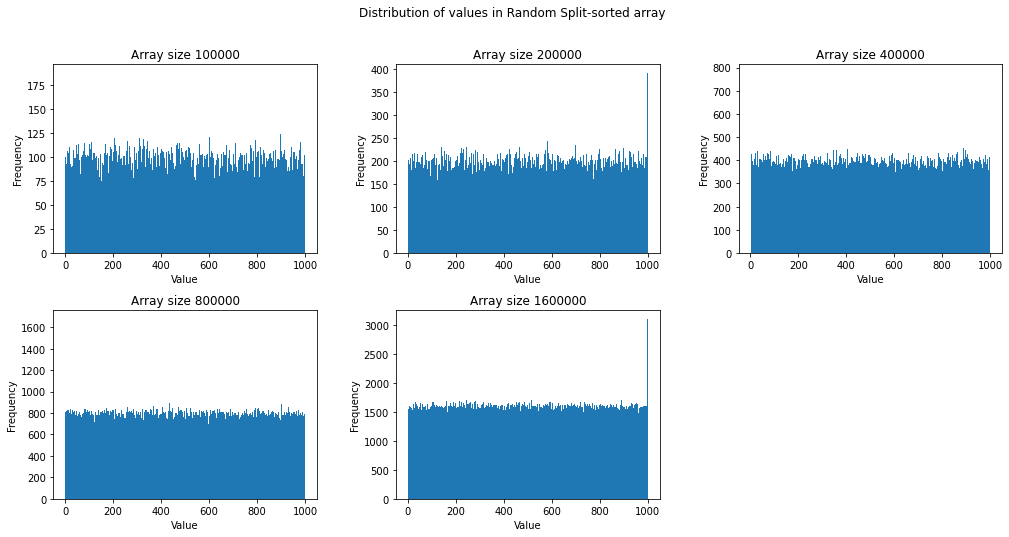

In [ ]:
fig, axs = plt.subplots(2, 3 ,figsize=(17,8))
fig.subplots_adjust(hspace = 0.3, wspace=0.3)
fig.suptitle('Distribution of values in Random Split-sorted array')
i = j = 0
for split_sorted in my_split_sorteds:
  axs[i, j].hist(split_sorted.arr, bins=list(range(min_value, max_value + 1)))
  axs[i, j].set_title("Array size " + str(len(split_sorted.arr))) 
  axs[i, j].set_xlabel("Value")
  axs[i, j].set_ylabel("Frequency") 
  j += 1
  if j == 3:
    i += 1
    j = 0

fig.delaxes(axs[i,j])

### Run worst case

In [ ]:
# Test Parameter Configuration
min_value = 1
max_value = 1
arr_size = [5000, 10000, 25000, 50000, 100000, 200000, 400000, 800000, 1600000]
number_of_test = 5

In [ ]:
table_data = []
for size in arr_size:
  split_sorted = SplitSorted(size, max_value, randint(0, size - 1))
  for _ in range(number_of_test):
    split_sorted.search(max_value + 1)
  search_result = split_sorted.searchResultDict[max_value + 1]
  row_data = [split_sorted.size, # Print size
                split_sorted.split_pos, # Print split position
                max_value + 1, # Print key
                search_result.count, # Print number of comparison operation
                search_result.recursiveCount, # Print number of recursive call
                "%.3f" % search_result.averageTime] # Print average time of 5 runs
  table_data.append(row_data)

    
print(tabulate(table_data, headers=headers, tablefmt=tablefmt))

+------------+----------------+----------------+--------------------+------------+-------------------+
| Array size | Split position | Searched value | Compare operations | Recursions | Average time (us) |
+------------+----------------+----------------+--------------------+------------+-------------------+
|    5000    |      1385      |       2        |        7505        |     0      |     1476.756      |
|   10000    |      5450      |       2        |       15005        |     0      |     2621.413      |
|   25000    |     13091      |       2        |       37505        |     0      |     6285.697      |
|   50000    |      8488      |       2        |       75005        |     0      |     12415.573     |
|   100000   |     87671      |       2        |       150005       |     0      |     24519.385     |
|   200000   |     163684     |       2        |       300005       |     0      |     49549.354     |
|   400000   |     298723     |       2        |       600005       |    

In [ ]:
# Test Parameter Configuration
min_value = 1
max_value = 1000
arr_size = [2500,5000, 10000, 25000, 50000, 100000, 200000, 400000, 800000, 1600000]
number_of_test = 5

In [ ]:
table_data = []
for size in arr_size:
  split_sorted = SplitSorted(size, max_value, randint(0, size - 1))
  for _ in range(number_of_test):
    split_sorted.search(max_value + 1)
  search_result = split_sorted.searchResultDict[max_value + 1]
  row_data = [split_sorted.size, # Print size
                split_sorted.split_pos, # Print split position
                max_value + 1, # Print key
                search_result.count, # Print number of comparison operation
                search_result.recursiveCount, # Print number of recursive call
                "%.3f" % search_result.averageTime] # Print average time of 5 runs
  table_data.append(row_data)

    
print(tabulate(table_data, headers=headers, tablefmt=tablefmt))

+------------+----------------+----------------+--------------------+------------+-------------------+
| Array size | Split position | Searched value | Compare operations | Recursions | Average time (us) |
+------------+----------------+----------------+--------------------+------------+-------------------+
|    5000    |      2670      |      1001      |         68         |     11     |      15.020       |
|   10000    |      7178      |      1001      |         74         |     12     |      16.045       |
|   25000    |     12999      |      1001      |         80         |     13     |      18.635       |
|   50000    |     34395      |      1001      |         91         |     15     |      20.696       |
|   100000   |     82829      |      1001      |         92         |     15     |      21.982       |
|   200000   |     69158      |      1001      |         98         |     16     |      22.487       |
|   400000   |     178466     |      1001      |        104         |    

### Run unit test for special cases

In [ ]:
import unittest

class TestSearchMethod(unittest.TestCase):

    # Test when the split occurred at position 0
    def test_split_at_0(self):
        # Create array
        my_split_sorted = SplitSorted(size = 10, max_value = 100, split_pos = 0)
        # Key at first
        value = my_split_sorted.arr[1]
        search_result = my_split_sorted.search(value)
        self.assertEqual(my_split_sorted.arr[search_result], value)

        # Key at last
        value = my_split_sorted.arr[9]
        search_result = my_split_sorted.search(value)
        self.assertEqual(my_split_sorted.arr[search_result], value)

        # Many Duplicates Array
        my_split_sorted = SplitSorted(size = 1000, max_value = 10, split_pos = 0)
        value = my_split_sorted.arr[1]
        search_result = my_split_sorted.search(value)
        self.assertEqual(my_split_sorted.arr[search_result], value)

    # Test when the required number is at the first position in array
    def test_key_at_first(self):
        # Normal array
        my_split_sorted = SplitSorted(size = 10, max_value = 100, split_pos = 5)
        value = my_split_sorted.arr[0]
        search_result = my_split_sorted.search(value)
        self.assertEqual(my_split_sorted.arr[search_result], value)

        # Many Duplicates Array
        my_split_sorted = SplitSorted(size = 1000, max_value = 10, split_pos = 90)
        value = my_split_sorted.arr[0]
        search_result = my_split_sorted.search(value)
        self.assertEqual(my_split_sorted.arr[search_result], value)

        # One-value array 
        my_split_sorted = SplitSorted(size = 10, max_value = 1, split_pos = 4)
        value = my_split_sorted.arr[0]
        search_result = my_split_sorted.search(value)
        self.assertEqual(my_split_sorted.arr[search_result], value)

    # Test when the required number is at the last position in array
    def test_key_at_last(self):
         # Normal array
        my_split_sorted = SplitSorted(size = 10, max_value = 100, split_pos = 5)
        value = my_split_sorted.arr[9]
        search_result = my_split_sorted.search(value)
        self.assertEqual(my_split_sorted.arr[search_result], value)

        # Many Duplicates Array
        my_split_sorted = SplitSorted(size = 1000, max_value = 10, split_pos = 90)
        value = my_split_sorted.arr[999]
        search_result = my_split_sorted.search(value)
        self.assertEqual(my_split_sorted.arr[search_result], value)

        # One-value array 
        my_split_sorted = SplitSorted(size = 10, max_value = 1, split_pos = 4)
        value = my_split_sorted.arr[9]
        search_result = my_split_sorted.search(value)
        self.assertEqual(my_split_sorted.arr[search_result], value)
        
    # Test when the required number is not in array
    def test_key_not_available(self):
        # Split-sorted array
        my_split_sorted = SplitSorted(size = 10, max_value = 100, split_pos = 2)
        search_result = my_split_sorted.search(101)
        self.assertEqual(search_result, -1)

        # Sorted array
        my_split_sorted = SplitSorted(size = 20, max_value = 100, split_pos = 0)
        search_result = my_split_sorted.search(101)
        self.assertEqual(search_result, -1)

        # Many Duplicates array
        my_split_sorted = SplitSorted(size = 1000, max_value = 10, split_pos = 2)
        search_result = my_split_sorted.search(101)
        self.assertEqual(search_result, -1)

In [ ]:
unittest.main(argv=['first-arg-is-ignored'], exit=False, verbosity=2)

test_key_at_first (__main__.TestSearchMethod) ... ok
test_key_at_last (__main__.TestSearchMethod) ... ok
test_key_not_available (__main__.TestSearchMethod) ... ok
test_split_at_0 (__main__.TestSearchMethod) ... ok

----------------------------------------------------------------------
Ran 4 tests in 0.020s

OK


# Question 2

### Find pair whose sum is closest to 0

In [ ]:
def pair_sum_closest(arr):
  # l and r saves the current position during traversal from two ends (left and right)
  # min_l and min_r saves 2 terms that currently create the smallest sum
  l = min_l = 0
  r = min_r = len(arr) - 1

  # to save the current min sum
  min_sum = abs(arr[l] + arr[r])

  # Traverse through the array from two ends in opposite directions
  while (l < r): 
    sum = arr[l] + arr[r]

    # If the calculated sum is less than the min sum
    if abs(sum) < min_sum:
      # Save new min sum and its corresponding pair numbers
      min_sum = sum
      min_l = l
      min_r = r

    # Regarding the absolute value, if one of the left element is greater than one of the right 
    if sum < 0:
      # Then update the left element
      l += 1 
    else: 
      # Else update the right element
      r -= 1
  # Return the indexes of the pair 
  return (min_l, min_r)

In [ ]:
arr = [-6, -3, -1, -0, 2, 3, 4, 5, 10, 12]
l, r = pair_sum_closest(arr)
print("Sum closest to 0 is:", arr[l] + arr[r])
print("Two integers are:", arr[l], "and", arr[r])

Sum closest to 0 is: -1
Two integers are: -6 and 5


### Find minimum required number of gates

In [ ]:
def max_gate(a, d):
  a.sort()
  d.sort()
  i = j = gate = max_gate = 0
  while i < len(a):
    if (a[i] <= d[j]):
      i += 1
      gate += 1
      max_gate = max(gate, max_gate)
    else:
        j += 1
        gate -= 1
  return max_gate

In [ ]:
arrival = ['1:00', '1:40', '1:50', '2:00','2:15', '4:00'] 
departure = ['1:10', '3:00', '2:20', '2:30', '3:15', '6:00']
print("The minimum number of gates required is:", max_gate(arrival, departure))

The minimum number of gates required is: 4


# Question 3: Smart Binary Search

### Define helper functions

In [ ]:
def smart_binary_search(arr, key, lo, hi):
 
    # Make sure the low position is smaller than high position
    # key must be in [low, high] range
    if (arr[hi] != arr[lo] and arr[lo] <= key <= arr[hi]): 
        # Calculate position (use uniform distribution property)
        pos = lo + ((hi - lo) // (arr[hi] - arr[lo]) *  (key - arr[lo]))
        # If new position is target
        if arr[pos] == key:
            return pos
 
        elif arr[pos] < key: # If key is larger than element
            return smart_binary_search(arr, key, pos + 1, hi) # Key is in right subarray 
 
        if arr[pos] > key: # If key is smaller than element
            return smart_binary_search(arr, key, lo, pos - 1) # Key is in left subarray 
    
    # If both of low and high element is key
    if arr[lo] == key:
        return lo 
    return -1

In [ ]:
def binary_search(arr, key, lo, hi):
    if lo > hi:
        return -1

    # Calculate the middle point
    mid = (lo + hi) // 2
    if key == arr[mid]: # If the mid point is the target
        return mid

    if key < arr[mid]: # If target is smaller => move to left subarray
        return binary_search(arr, key, lo, mid-1)
    else: # Else, move to right subarray
        return binary_search(arr, key, mid+1, hi)

### Run test

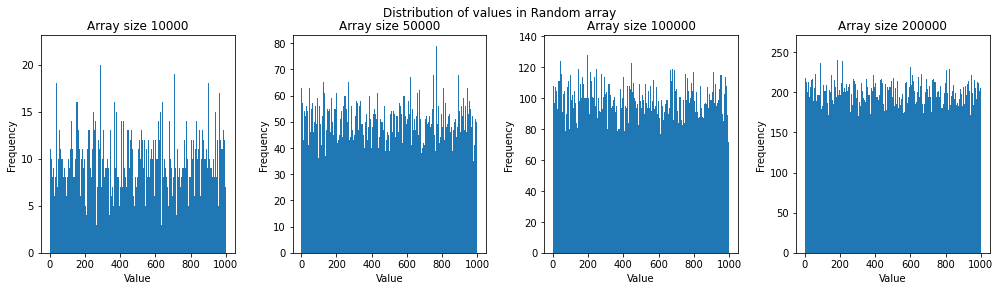

In [ ]:
## Finding suitable array size
fig, axs = plt.subplots(1, 4 ,figsize=(17,4))
fig.subplots_adjust(hspace = 0.3, wspace=0.3)
fig.suptitle('Distribution of values in Random array')
i = j = 0
for size in [10000, 50000, 100000, 200000]:
  my_test = random_sorted(size, 1000)
  axs[j].hist(my_test, bins=list(range(1, 1001)))
  axs[j].set_title("Array size " + str(size))
  axs[j].set_xlabel("Value")
  axs[j].set_ylabel("Frequency") 
  j += 1

=> From 100,000 size, the random array is nearly uniformly distributed

In [ ]:
arr_list = []
size_list = [100000, 200000, 400000, 800000, 1600000]
for size in size_list:
  arr_list.append(random_sorted(size, 1000))

In [ ]:
def run_search(arr, key, func):
  timings = []
  for i in range(5):
    start = timer()
    result = func(arr, key, 0, len(arr)-1)
    timings.append(timer() - start)
  return (sum(timings) / len(timings)) * 1000000

In [ ]:
def run_test_bs(arr_list, key, size_list):
  table_data = []
  bs_data = []
  sbs_data = []
  for arr in arr_list:
    sbsTime = run_search(arr, key, smart_binary_search)
    bsTime = run_search(arr, key, binary_search)
    row_data = [len(arr) , # Print size
                key, # Print key
                "%.3f" % bsTime, # Print time for bs
                "%.3f" % sbsTime,# Print time for smart bs
            ] 
    table_data.append(row_data)
    bs_data.append(bsTime)
    sbs_data.append(sbsTime)
  
  # Print result
  print(tabulate(table_data, headers=["Array size", "Key", "BS time (us)", "Smart BS time (us)"], tablefmt="pretty"))

  # Plot line graph
  plt.plot(size_list, bs_data, color='g', label="binary search")
  plt.plot(size_list, sbs_data, color='orange', label="smart binary search")
  plt.xlabel('Array size')
  plt.ylabel('Run time')
  plt.title('Running time of Binary Search vs Smart Binary Search with key ' + str(key))
  plt.legend()
  plt.show()

#### Key in middle

+------------+-----+--------------+--------------------+
| Array size | Key | BS time (us) | Smart BS time (us) |
+------------+-----+--------------+--------------------+
|   100000   | 500 |    8.666     |       14.597       |
|   200000   | 500 |    9.348     |       3.664        |
|   400000   | 500 |    9.411     |       3.698        |
|   800000   | 500 |    0.782     |       7.366        |
|  1600000   | 500 |    0.787     |       3.328        |
+------------+-----+--------------+--------------------+


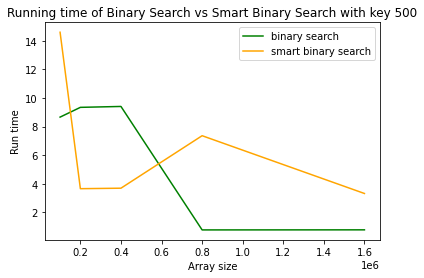

In [ ]:
run_test_bs(arr_list, 500, size_list)

#### Key at first

+------------+-----+--------------+--------------------+
| Array size | Key | BS time (us) | Smart BS time (us) |
+------------+-----+--------------+--------------------+
|   100000   |  1  |    22.482    |       6.665        |
|   200000   |  1  |    15.174    |       6.451        |
|   400000   |  1  |    16.438    |       5.888        |
|   800000   |  1  |    16.684    |       5.570        |
|  1600000   |  1  |    15.291    |       4.910        |
+------------+-----+--------------+--------------------+


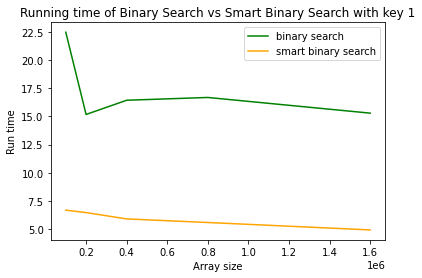

In [ ]:
run_test_bs(arr_list, 1, size_list)

#### Key at last

+------------+-----+--------------+--------------------+
| Array size | Key | BS time (us) | Smart BS time (us) |
+------------+-----+--------------+--------------------+
|   100000   | 999 |    18.494    |       15.964       |
|   200000   | 999 |    15.083    |       12.522       |
|   400000   | 999 |    19.021    |       11.040       |
|   800000   | 999 |    15.247    |       5.481        |
|  1600000   | 999 |    20.264    |       6.004        |
+------------+-----+--------------+--------------------+


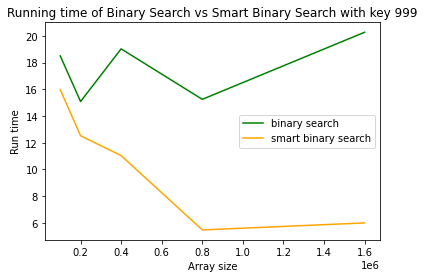

In [ ]:
run_test_bs(arr_list, 999, size_list)

#### Key not available

+------------+------+--------------+--------------------+
| Array size | Key  | BS time (us) | Smart BS time (us) |
+------------+------+--------------+--------------------+
|   100000   | 1001 |    15.774    |       1.912        |
|   200000   | 1001 |    20.409    |       1.940        |
|   400000   | 1001 |    17.657    |       1.838        |
|   800000   | 1001 |    19.415    |       1.865        |
|  1600000   | 1001 |    19.568    |       1.910        |
+------------+------+--------------+--------------------+


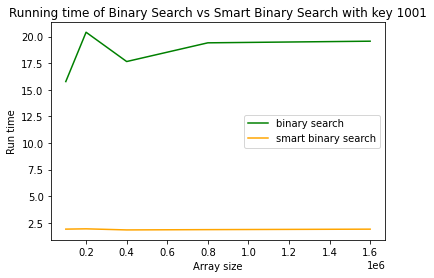

In [ ]:
run_test_bs(arr_list, 1001, size_list)

# Question 4: Arranging items

In [ ]:
class Item:
  def __init__(self, weight, strength):
    self.weight = weight
    self.strength = strength
    self.sum = weight + strength
  def to_string(self):
    print("Item: " + str(self.weight) + " " + str(self.strength))

In [ ]:
def arrange_items(items):
  items.sort(key=lambda x: x.sum, reverse=True)
  
  bag = [items[0]]
  min_strength = items[0].strength

  for item in items[1:]:
    if (min_strength >= item.weight):
      bag.insert(0, item)
      min_strength -= item.weight
      if (item.strength < min_strength):
        min_strength = item.strength
    else:
      return None
  return bag

In [ ]:
item_list = [Item(4, 3), Item(3, 6), Item(1, 9), Item(2, 2)]
bag = arrange_items(item_list)
if (bag is None):
  print("No possible arrangement")
else:
  for item in bag:
    item.to_string()

Item: 2 2
Item: 4 3
Item: 3 6
Item: 1 9


In [ ]:
item_list = [Item(4, 3), Item(3, 6), Item(1, 8), Item(2, 2)]
bag = arrange_items(item_list)
if (bag is None):
  print("No possible arrangement")
else:
  for item in bag:
    item.to_string()

No possible arrangement
